<a href="https://colab.research.google.com/github/prasanth-balaraman-engineer/inside-deep-learning/blob/main/02_fully_connected_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

<Axes: >

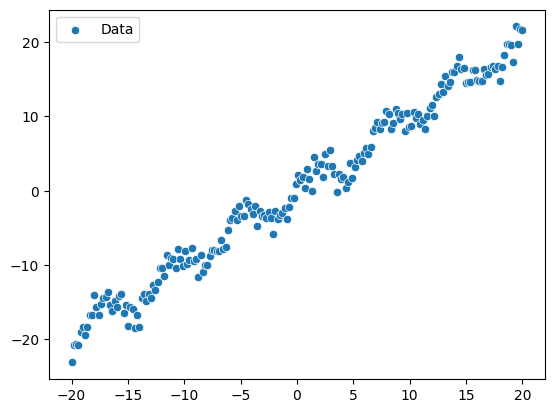

In [2]:
X = np.linspace(-20, 20, 200)
y = X + np.sin(X) * 2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y, label='Data')

In [3]:
class Simple1DDataset(Dataset):
  def __init__(self, X, y):
    self.X = X.reshape((-1, 1))
    self.y = y.reshape((-1, 1))

  def __getitem__(self, index):
    inputs = torch.tensor(data=self.X[index], dtype=torch.float32)
    labels = torch.tensor(data=self.y[index], dtype=torch.float32)
    return inputs, labels

  def __len__(self):
    return self.X.shape[0]


def move_to(obj, device):
  if isinstance(obj, list):
    return [move_to(o, device) for o in obj]
  elif isinstance(obj, tuple):
    return tuple(move_to(list(obj), device))
  elif isinstance(obj, set):
    return set(move_to(list(obj), device))
  elif isinstance(obj, dict):
    result = dict()
    for key, value in obj.items():
      result[move_to(key, device)] = move_to(value, device)
    return result
  elif hasattr(obj, 'to'):
    return obj.to(device)
  else:
    return obj


def train_simple_network(model, loss_function, training_loader, learning_rate=0.001, epochs=20, device=torch.device('cpu')):
  optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)
  model.to(device)

  for epoch in tqdm(range(epochs), desc='Epoch'):
    model = model.train()
    running_loss = 0.0

    for inputs, labels in training_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()
      y_hat = model(inputs)
      loss = loss_function(y_hat, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

  print(f'\nloss: {running_loss}')

In [14]:
input_features = 1
output_features = 1
model = nn.Linear(input_features, output_features)
loss_function = nn.MSELoss()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
training_loader = DataLoader(dataset=Simple1DDataset(X, y), shuffle=True)
train_simple_network(model, loss_function, training_loader, epochs=100, learning_rate=0.0001, device=device)

Epoch: 100%|██████████| 100/100 [00:16<00:00,  6.02it/s]


loss: 597.3503138161395


<Axes: >

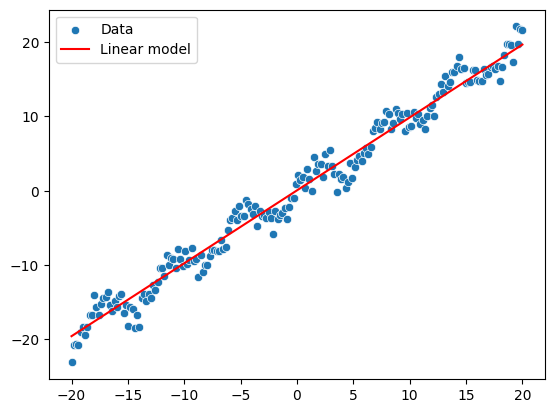

In [15]:
with torch.no_grad():
  inputs = torch.tensor(data=X.reshape((-1, 1)), dtype=torch.float32).to(device)
  y_pred = model(inputs).cpu().numpy()

sns.scatterplot(x=X, y=y, label='Data')
sns.lineplot(x=X, y=y_pred.ravel(), label='Linear model', color='red')

In [19]:
hidden_features = 10
model = nn.Sequential(
    nn.Linear(input_features, hidden_features),
    nn.Linear(hidden_features, output_features),
)
train_simple_network(model, loss_function, training_loader, epochs=100, learning_rate=0.0001, device=device)

Epoch: 100%|██████████| 100/100 [00:18<00:00,  5.37it/s]


loss: 622.4122648131743


<Axes: >

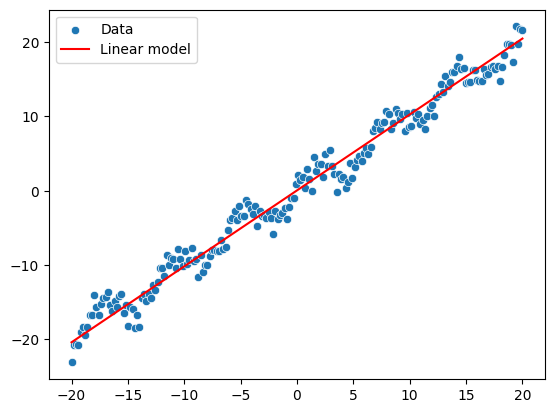

In [20]:
with torch.no_grad():
  inputs = torch.tensor(data=X.reshape((-1, 1)), dtype=torch.float32).to(device)
  y_pred = model(inputs).cpu().numpy()

sns.scatterplot(x=X, y=y, label='Data')
sns.lineplot(x=X, y=y_pred.ravel(), label='Linear model', color='red')

<Axes: >

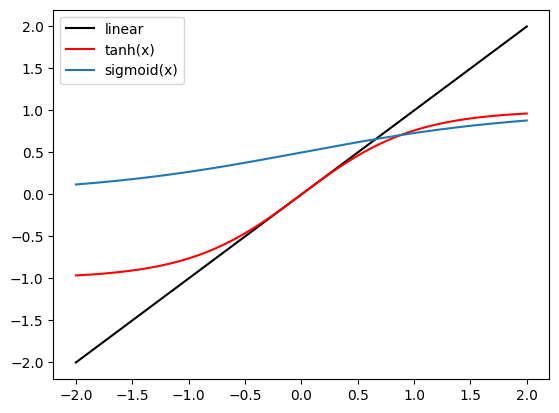

In [28]:
activation_inputs = np.linspace(-2, 2, 200)
tanh_activations = np.tanh(activation_inputs)
sigmoid_activations = np.exp(activation_inputs) / (np.exp(activation_inputs) + 1)

sns.lineplot(x=activation_inputs, y=activation_inputs, color='black', label='linear')
sns.lineplot(x=activation_inputs, y=tanh_activations, color='red', label='tanh(x)')
sns.lineplot(x=activation_inputs, y=sigmoid_activations, label='sigmoid(x)')

In [57]:
model = nn.Sequential(
    nn.Linear(input_features, hidden_features),
    nn.Tanh(),
    nn.Linear(hidden_features, output_features),
)
train_simple_network(model, loss_function, training_loader, epochs=500, learning_rate=0.001, device=device)

Epoch: 100%|██████████| 500/500 [01:39<00:00,  5.04it/s]


loss: 647.6590854011893


<Axes: >

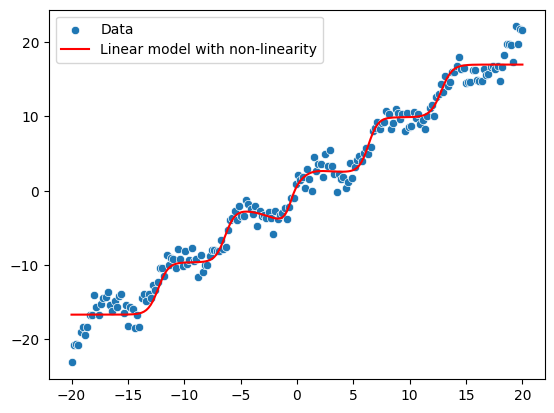

In [58]:
with torch.no_grad():
  inputs = torch.tensor(data=X.reshape((-1, 1)), dtype=torch.float32).to(device)
  y_pred = model(inputs).cpu().numpy()

sns.scatterplot(x=X, y=y, label='Data')
sns.lineplot(x=X, y=y_pred.ravel(), label='Linear model with non-linearity', color='red')